# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
City           7 non-null object
State          7 non-null object
Temperature    7 non-null float64
dtypes: float64(1), object(2)
memory usage: 248.0+ bytes


- we have 2 object columns and 1 float64 column

#### Select the rows where state is New York

In [5]:
temp[temp.State == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
temp[temp.State == "New York"].Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp[temp.Temperature > 15][['City','State']]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp[temp.Temperature > 15][['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
temp[(temp.Temperature < 20) & (temp.Temperature > 15)][['City']]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
state_mean = temp.groupby(temp.State).Temperature.mean()
print(type(state_mean))
state_mean

<class 'pandas.core.series.Series'>


State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [11]:
state_std = temp.groupby('State').Temperature.std()
print(type(state_std))
state_std

<class 'pandas.core.series.Series'>


State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

In [12]:
def temperatureMS(data):
    state = temp.groupby('State')
    mean = state.Temperature.mean()
    std = state.Temperature.std()
    return mean, std
                        
temperatureMS(temp)

(State
 Connecticut    15.833333
 New Jersey     21.111111
 New York       10.740741
 Name: Temperature, dtype: float64, State
 Connecticut    1.964186
 New Jersey     1.571348
 New York       8.133404
 Name: Temperature, dtype: float64)

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Name          9 non-null object
Department    9 non-null object
Education     9 non-null object
Gender        9 non-null object
Title         9 non-null object
Years         9 non-null int64
Salary        9 non-null int64
dtypes: int64(2), object(5)
memory usage: 584.0+ bytes


- we have 5 object columns and 2 int64 columns

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

AxesSubplot(0.125,0.125;0.775x0.755)


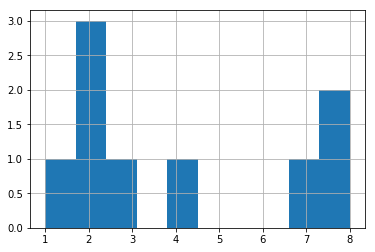

In [15]:
print(employee['Years'].hist())

- This histogram tells us a bigger portion of the employees have worked for 4 years or less 

AxesSubplot(0.125,0.125;0.775x0.755)


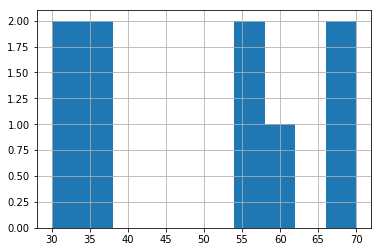

In [16]:
print(employee['Salary'].hist())

- This histogram tells us there is a big salary gap between the employees in the lower end and the ones of the upper end 
- We as well can see that a bigger portion of the employees are in the higher end 

#### What's the average salary in this company?

In [17]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [18]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [19]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [20]:
employee[employee.Salary == 30][['Name']]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [21]:
employee[employee['Name']=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [22]:
employee[employee['Name']=='David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [23]:
employee[employee.Title == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [24]:
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [25]:
employee.loc[0:2,:]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [26]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [27]:
employee[(employee.Title == "associate")&(employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [28]:
employee.groupby(employee.Years).Salary.mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [29]:
employee.groupby(employee.Title).Salary.mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

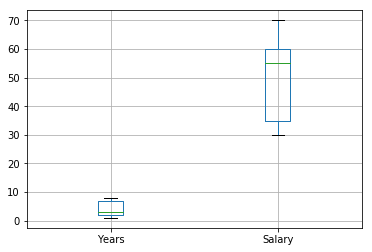

In [30]:
employee.boxplot()

In [31]:
# first quartile
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [32]:
# third quartile 
employee.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [33]:
employee.groupby(employee.Gender).Salary.mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [34]:
employee.groupby(employee.Department).describe().iloc[:,[1,3,7,9,11,15]]

Salary                 Years          
             mean   min   max      mean  min  max
Department                                       
HR          45.00  30.0  70.0  4.666667  2.0  8.0
IT          48.75  30.0  70.0  4.500000  1.0  8.0
Sales       55.00  55.0  55.0  2.500000  2.0  3.0

In [35]:
def numericColumns(df):
    numeric = employee.select_dtypes(include='int64').groupby(employee.Department)
    mean = numeric.mean()
    mini = numeric.min()
    maxi = numeric.max()
    return mean, mini, maxi
                       
numericColumns(employee)

(               Years  Salary
 Department                  
 HR          4.666667   45.00
 IT          4.500000   48.75
 Sales       2.500000   55.00,             Years  Salary
 Department               
 HR              2      30
 IT              1      30
 Sales           2      55,             Years  Salary
 Department               
 HR              8      70
 IT              8      70
 Sales           3      55)

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [36]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [65]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [61]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
Unnamed: 0      397924 non-null int64
InvoiceNo       397924 non-null int64
StockCode       397924 non-null object
year            397924 non-null int64
month           397924 non-null int64
day             397924 non-null int64
hour            397924 non-null int64
Description     397924 non-null object
Quantity        397924 non-null int64
InvoiceDate     397924 non-null object
UnitPrice       397924 non-null float64
CustomerID      397924 non-null int64
Country         397924 non-null object
amount_spent    397924 non-null float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [63]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [66]:
orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [67]:
orders.amount_spent.min()

0.0

In [68]:
orders.amount_spent.max()

168469.6

#### Select all the customers we have in Spain

In [185]:
set(orders[orders["Country"] == "Spain"]["CustomerID"])

{12354,
 12417,
 12421,
 12442,
 12445,
 12448,
 12450,
 12454,
 12455,
 12462,
 12484,
 12502,
 12507,
 12510,
 12538,
 12539,
 12540,
 12541,
 12544,
 12545,
 12546,
 12547,
 12548,
 12550,
 12551,
 12556,
 12557,
 12596,
 12597,
 17097}

In [204]:
id_unique = orders.set_index("CustomerID")
id_unique[id_unique.Country == "Spain"]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,Country,amount_spent
CustomerID,,,,,,,,,,,,,
12557,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,Spain,115.50
12557,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,Spain,145.00
12557,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,Spain,99.00
12557,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,Spain,115.50
12557,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,Spain,145.00
17097,21565,538095,22504,2010,12,4,14,cabin bag vintage retrospot,1,2010-12-09 14:55:00,29.95,Spain,29.95
17097,21566,538095,22212,2010,12,4,14,four hook white lovebirds,1,2010-12-09 14:55:00,2.10,Spain,2.10
17097,21567,538095,22953,2010,12,4,14,birthday party cordon barrier tape,1,2010-12-09 14:55:00,1.25,Spain,1.25
17097,21568,538095,84818,2010,12,4,14,danish rose photo frame,1,2010-12-09 14:55:00,2.55,Spain,2.55


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
set(orders[orders["Country"] == "Spain"]["CustomerID"])
set(orders[orders["Country"] == "Spain"]["CustomerID"])

In [168]:
groupby.value_counts orders.groupby(orders.Department)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

#### Select all the customers who have bought more than 50 items ?

In [139]:
id_unique = orders[orders.Quantity > 50]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
175,177,536386,85099B,2010,12,3,9,jumbo bag red retrospot,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
176,178,536387,79321,2010,12,3,9,chilli lights,192,2010-12-01 09:58:00,3.82,16029,United Kingdom,733.44
177,179,536387,22780,2010,12,3,9,light garland butterfiles pink,192,2010-12-01 09:58:00,3.37,16029,United Kingdom,647.04
178,180,536387,22779,2010,12,3,9,wooden owls light garland,192,2010-12-01 09:58:00,3.37,16029,United Kingdom,647.04
179,181,536387,22466,2010,12,3,9,fairy tale cottage nightlight,432,2010-12-01 09:58:00,1.45,16029,United Kingdom,626.40


#### Select orders from Spain that are above 50 items

In [46]:
# your answer here

#### Select all free orders

In [47]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [48]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [49]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [50]:
# your answer here

#### Select all orders made in the month of August

In [51]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [52]:
# your answer here

#### What's the  average amount of money spent by country

In [53]:
# your answer here

#### What's the most expensive item?

In [54]:
# your answer here

#### What was the average amount spent per year ?

In [55]:
# your answer here